# 01 - Image Analysis

References:
 - https://python.langchain.com/docs/integrations/llms/ollama/
  -


In [1]:
%pip install -q langchain langchain-ollama langchain-chroma ipython

Note: you may need to restart the kernel to use updated packages.


In [38]:
from PIL import Image
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate

from util import convert_to_base64, plt_img_base64

In [39]:
# Globals
# from langchain import globals
#globals.set_debug(True)

dataset_directory = "/mnt/network-data/storage/projects/vf/data"

vision_model = "llama3.2-vision"
ollama_api_endpoint = "http://jupiter.btech.software:11434"
llm = OllamaLLM(
    model=vision_model,
    base_url=ollama_api_endpoint,
    temperature=0.5,
    num_predict=1024
)
llm.format = None

query = "Describe this image"


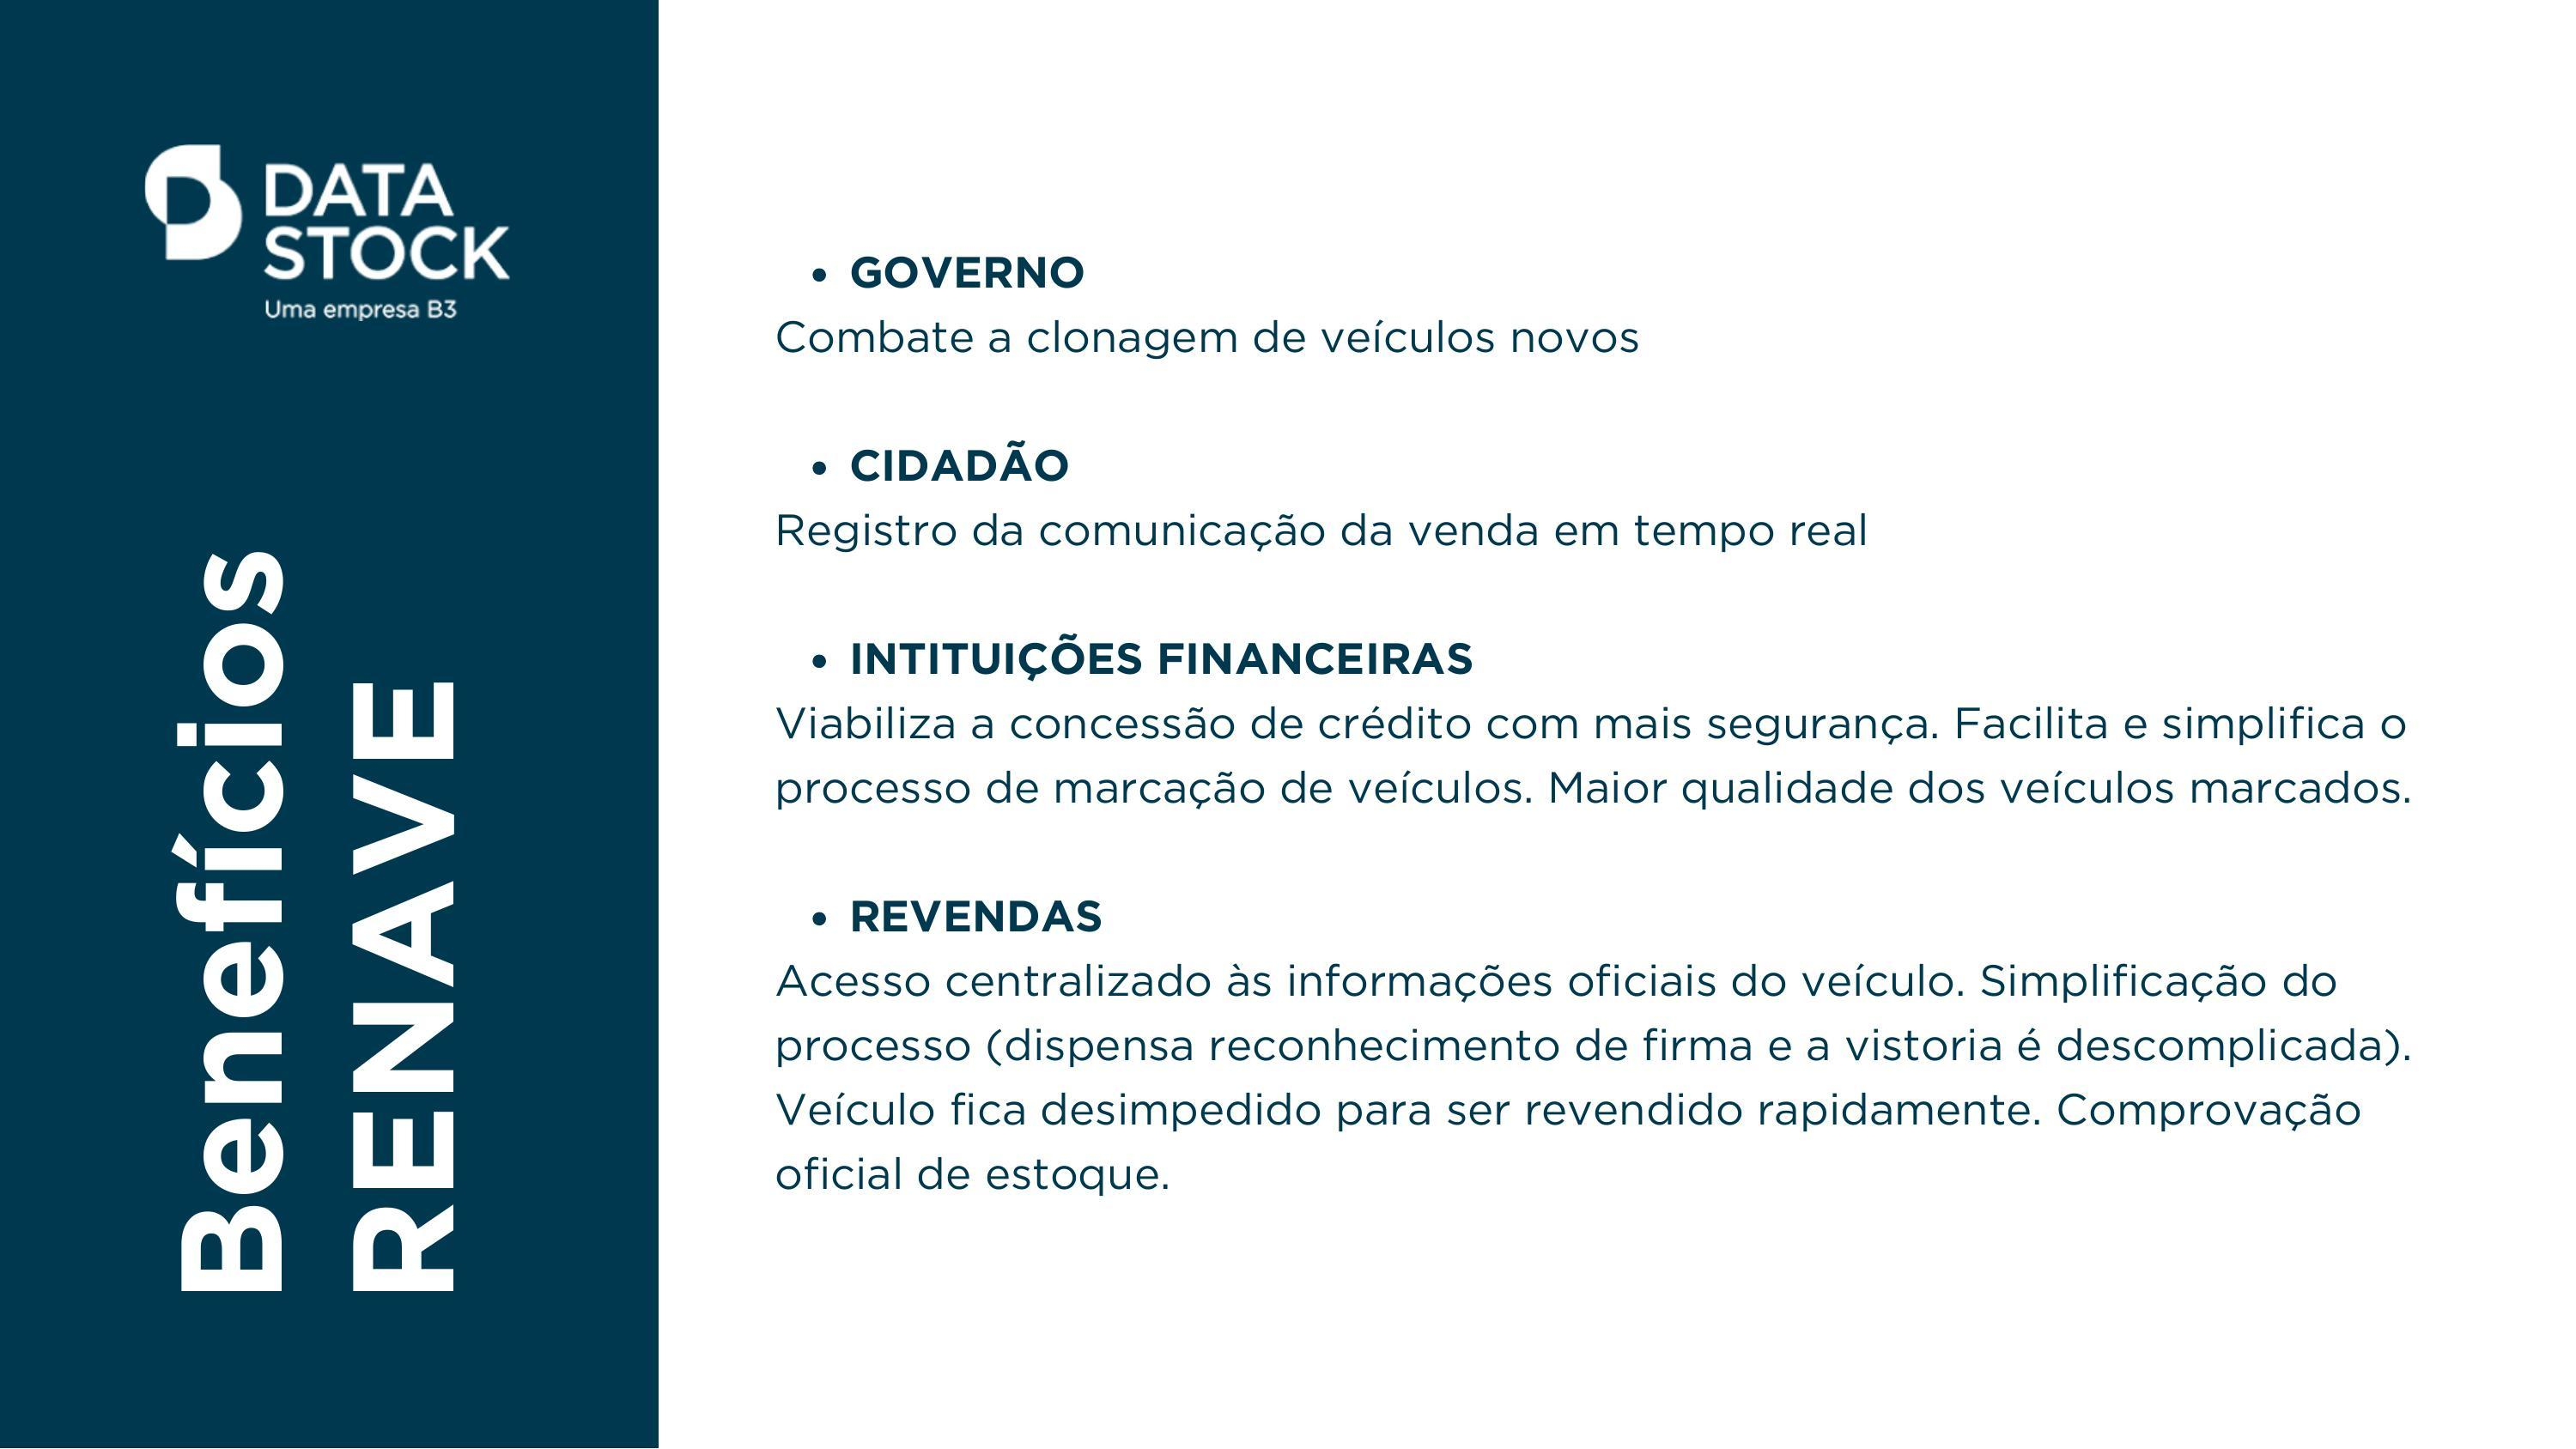

The image presents a slide from a presentation about the benefits of using RENAVE, a system for registering and managing vehicles in Brazil. The slide is divided into two sections: a dark blue section on the left with white text and a light gray section on the right with black text.

* **Dark Blue Section**
	+ Features the logo "DATA STOCK" in white text at the top
	+ Includes the tagline "Uma empresa B3" in smaller white text below the logo
	+ Displays the title "Benefícios RENAVE" in large white text vertically along the left side of the section
* **Light Gray Section**
	+ Lists four benefits of using RENAVE:
		- GOVERNO: Combats cloning of new vehicles
		- CIDADÃO: Provides real-time communication with vehicle registration information
		- INTITUIÇÕES FINANCEIRAS: Simplifies and streamlines the financing process for vehicle purchases
		- REVENDAS: Offers centralized access to official vehicle information, simplifying the sales process

Overall, the slide effectively communicates the 

In [40]:
image_path = f"{dataset_directory}/DataStock/NOVA_Apresentação Comercial DataStock-page-11.jpg"
image_b64 = convert_to_base64(Image.open(image_path))
response = llm.bind(images=[image_b64]).invoke(query)
plt_img_base64(img_base64=image_b64)
print(response)

In [43]:
prompt = PromptTemplate(
    template="""
    You are VF, a sales specialist AI built by EHC. You are intended to study and build knowledge sharing material from business documents and images, often taking an instructor perspective, and you always strive towards creating useful learning content.

    Remember that you have these general abilities, and many others as well which are not listed here:
    * You can analyze understand business context and how the given documents and images align with sales.
    * You can identify business entities such as products, services and organizations.
    * You can interpret business information such as financial figures, financial balances, financial results, promotional presentations, pitches, product manuals, guides, etc.

    Remember these are some of the abilities that you do NOT have:
    * You CANNOT make up answers or facts.

    Follow the given instructions to format your answer:

    {query}
    """,
    input_variables=["query"],
)

vision_chain = prompt | llm.bind(images=[image_b64])
response = vision_chain.invoke({'query': """
This is a promotional portfolio image. Analyse the image supplying information about the following aspects:
- Brands identified
- Products identified
- Services identified
- Business organizations identified
- Key concepts
- How information presented in slide can help increase sales performance improvement
- General summary of all of the above in english and in portuguese (ptBR)
"""})
print(response)

The image presents a promotional portfolio for Data Stock, a company that offers data management services. The image is divided into two sections: a dark blue section on the left and a white section on the right.

**Brands Identified**

* Data Stock: The company's name is prominently displayed in large font at the top of the image.

**Products/Services Identified**

* Data Management Services: Although not explicitly stated, the image suggests that Data Stock provides data management services to various companies.

**Business Organizations Identified**

* Data Stock: The company itself is a business organization that offers data management services.

**Key Concepts**

* Data Management
* Business Intelligence
* Data Analytics

**How Information Presented in Slide Can Help Increase Sales Performance Improvement**

The image presents a clear and concise overview of the benefits of using Data Stock's data management services. By highlighting the advantages of their services, such as incre